# 目的
`sklearn`や`Tensorflow`を用いた機械学習または深層学習の練習を行う。

In [1]:
# -*- coding: utf-8 -*-
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from FX.FX import SQLAnaforFX
from FX.FX import drawfigfunc as dff
from FX.FX import analyzefuncs as af

Using TensorFlow backend.


# sklearn
sklearnで深層学習に相当するものは`sklearn.neural_network`に含まれている。   
いわゆる多層パーセプトロン分類機（Multi-Layer Perceptron classifier）が利用できる。   
他の機械学習アルゴリズムのAPIは[こちら](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)に掲載されている。   

## MLPClassifierの引数
[こちら](http://qiita.com/ToshikiShimizu/items/3c0b8713a26ee10b689e)に簡潔にまとめられていて、大変助かる。
```
hidden_layer_sizes=(100, )#隠れ層のノード数(多層にもできる)
activation='relu'#活性化関数(identify, logistic, tanh, relu)
solver='adam'#最適化手法(lbfgs(準ニュートン法), sgd, adam)
alpha=0.0001 # L2ペナルティ
batch_size='auto'#バッチサイズ(sgd, adamで適用)
learning_rate='constant' # 学習係数を変えるかどうか
learning_rate_init=0.001 # 学習係数
power_t=0.5
max_iter=200#最大エポック数
shuffle=True#iterationの度にサンプルをシャッフル
random_state=None #乱数の種
tol=0.0001 # 最適化のための許容誤差
verbose=False # Whether to print progress messages to stdout
warm_start=False
momentum=0.9
nesterovs_momentum=True
early_stopping=False
validation_fraction=0.1
beta_1=0.9
beta_2=0.999
epsilon=1e-08
```

In [2]:
from sklearn.neural_network import MLPClassifier

## サンプルコード
「[Compare Stochastic learning strategies for MLPClassifier](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)」を試してみる。ベンチマーク的な。   

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.980000
Training set loss: 0.096922
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.050260
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.050277
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.979983
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504017
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504760
training: adam
Training set score: 0.980000
Training set loss: 0.046248

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling learning-rate
Training set score: 0.638843
Training set los

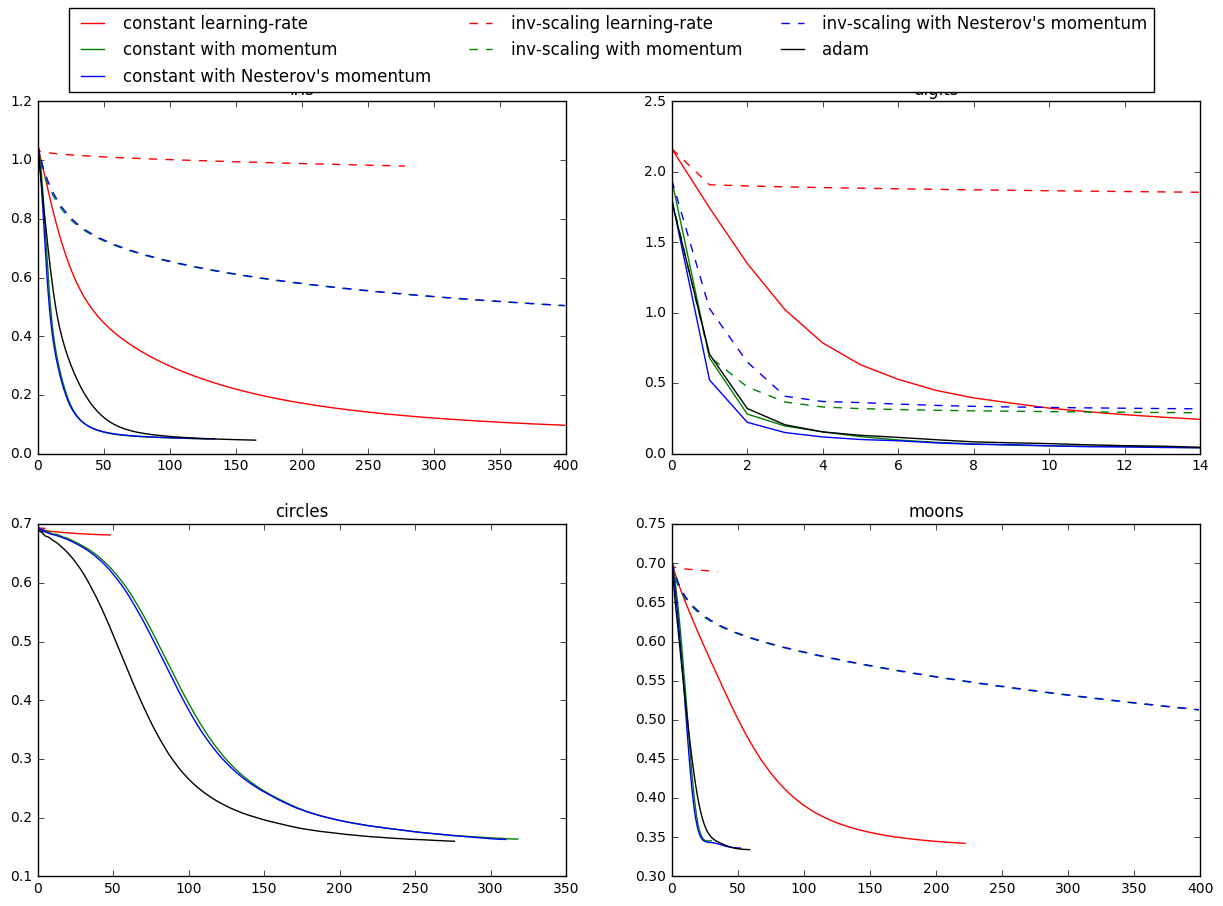

In [3]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels=labels, ncol=3, loc="upper center")
plt.show()

## サンプルコードその２
訓練に用いるデータの用意やMLPC中で用いる乱数の種を変えると、正解率が大きく変わる。

In [2]:
"""sklearn_nn.py"""
# -*- coding: utf-8 -*-
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
clf = MLPClassifier(solver="sgd",random_state=10,max_iter=10000)
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))
print(clf.predict(X_test)==y_test)

0.955555555556
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [14]:
np.savetxt(fname="../../data/sklearn/iris_y.csv", X=y, delimiter=",")

このIrisのサンプルコードは、非常にシンプルに使い方を記述している。   
1. まずデータセット`X`と正解`Y`を用意する。
    * 今回は特徴量が４つ：萼片の長さと幅、花弁の長さと幅
2. 次にデータセットを`train_test_split`で分ける
    * X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
3. MLPClassifierオブジェクトを初期化する。
    * clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
    * パラメータは上の方で述べているもの。
    * ソルバーは３つ：
        + lbfgs: 準ニュートン法
        + sgd: 確率的勾配降下法（Stochastic Gradiant Descent）
        + adam: Adaptive moment estimation
4. 訓練用データでパラメータを決める
    * clf.fit(X_train, y_train)
5. データを与えて予測させる。
    * clf.predict(X)

Optimizerについては、[こちら](http://qiita.com/tokkuman/items/1944c00415d129ca0ee9#adam)に詳しく記載されている。   
ほかのOptimizerを使用したい場合は、自前で実装するか、他のフレームワーク（モジュール）を利用すること。

In [ ]:
iris.feature_names, iris.data

# 実際にFXデータで試してみる
FXの上がった・下がったで予測が可能か試す。   
irisのデータはばらつきが小さいため予測がしやすいが、こちらは時間によって前後の差の大きさが大きく変わる。   
それは正規化をしようが関係ない（そもそも正規化は、特徴量の間のばらつきが大きい場合に特徴量の間の差異を減らすためにある）。

## データの用意
差分をとって、100この連続するデータを特徴量とするようにデータを用意する。   
対象とするのは１分足。

### DBからの読み込み
予め作成されたデータベースから、close（終値）を読み込む。そしてその差分をとる。   
最初のデータに対する差分はゼロであるから、それを付け加えておく。

In [ ]:
dbpath = "201704"
sql = SQLAnaforFX(dbpath)
sql.showtablenames()

In [ ]:
close = sql.toDataFrame("ask01min", colselect=["close"]).as_matrix()[:,0]
dclose = np.zeros_like(close)
dclose[1:] = np.diff(close)

In [ ]:
plt.figure(figsize=(5,5))
plt.hold(True)
plt.plot(dclose[0:100], label="diff")
plt.plot(close[:100]-close[0], label="close")
plt.legend(loc=3)
plt.xlabel("step")
plt.ylabel("$\\Delta M$")
plt.grid()

### 正解ラベルの作成
時刻 $n$ における価格を $M(n)$ として、ステップ $k$ だけ進んだ時点での価格 $M(n+k)$ が $M(n)$ より大きいかどうか、
そしてその差がスプレッド $s$ より大きいかどうかで、場合分けができる。すなわち   

* Label 1: $M(n+k) - M(n) > s$
* Label 2: $|M(n+k) - M(n)| < s$
* Label 3: $M(n+k) - M(n) < -s$

ステップ $k$ を変えつつこのラベリングを行い、最も予想確率が高い $k$ とその時のパラメータを探索する。   
もし最大となる予想確率が８割を超えない場合、別の特徴量の組み合わせを検討する。

In [ ]:
# Calculate mean spread
close_bid = sql.toDataFrame("bid01min", colselect=["close"]).as_matrix()
s = np.mean((close - close_bid)[close != 0])

In [ ]:
# Labeling
def labeling(M, s, k=1):
    """
    Label each value of `M`.
    Labeling follows the below rule:
        * Label 0 (higher):  $M(n+k) - M(n) > s$
        * Label 1 (lose)  : $|M(n+k) - M(n)| < s$
        * Label 2 (lower) :  $M(n+k) - M(n) < -s$
    If a value cannot be labeled for some reasons (e.g. the earlier data are missing),
    they should be set to 1 (lose).
    
    < Input >
        M: value array to label
        k: step
        s: criterion
    """
    diff = M[k:] - M[:-k]
    label = np.ones_like(diff)
    label[diff>s] = 0
    label[diff<-s] = 2
    
    output = np.ones_like(M)
    output[k:] = label[:]
    return output.copy()

### 使えそうなラベルの作成
loseができるだけ少ないラベルは使えそうなラベル？

In [ ]:
ks = np.arange(1, 100)
labels = np.zeros((len(ks), 3))
for ii in range(len(ks)):
    labeled = labeling(dclose, s, ks[ii])
    labels[ii] = np.array([sum(labeled==n) for n in range(3)])

In [ ]:
print((labels[:,0]+labels[:,2])/np.sum(labels, axis=1))

ラベリングで分かったのは、spread = 0.01ではloseする確率が高いということ。

### スプレッドが0.003だと？
だいたい70%で勝てそう？   
もちろん、予測が当たる確率とは異なるが、知っておくとよいかもしれない。

In [ ]:
ks = np.arange(1, 100)
labels = np.zeros((len(ks), 3))
for ii in range(len(ks)):
    labeled = labeling(dclose, 0.003, ks[ii])
    labels[ii] = np.array([sum(labeled==n) for n in range(3)])
print((labels[:,0]+labels[:,2])/np.sum(labels, axis=1))

## 学習
とりあえず100でやってみる。

In [ ]:
labeled = labeling(dclose, 0.01, 100)
y = labeled

### closeを入力とする

In [ ]:
# 学習データは X=`close`, Y=`labeled` である
X = close[:,None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(200,))
_ = clf.fit(X_train, y_train)
# print (clf.score(X_test, y_test))
# print(clf.predict(X_test)==y_test)

In [ ]:
print(clf.score(X_test, y_test))

正解確率39%、、、予測には使えない。

### 前のデータをふくめて100個を入力とする

In [ ]:
def historical(M, k=1):
    if k< 1:
        raise ValueError("k must be >=1.")
    elif k == 1:
        return M
    elif (len(M)-k)*k > 1e7:
        raise ValueError("(len(M)-k)*k > 1e7.")
    else:
        output = np.zeros((len(M), k))
        # First `k` rows
        for ii in range(k-1):
            _ = M[0] * np.ones(k)
            if ii > 0:
                _[-ii:] = M[1:ii+1]
            output[ii] = _.copy()
        # Other rows
        for ii in range(k-1, len(M)):
            output[ii] = M[ii-k+1:ii+1]
    return output

In [ ]:
X = historical(close, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(100,))
_ = clf.fit(X_train, y_train)

In [ ]:
print(clf.score(X_test, y_test))

一緒の値になる。   
履歴データとして扱わない場合は、closeの列として与えても特徴量としてはcloseそのものと同じ？   

### dcloseを入力としてみる

In [ ]:
# 学習データは X=`close`, Y=`labeled` である
X = dclose[:,None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(200,))
_ = clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))
# print(clf.predict(X_test)==y_test)

In [ ]:
# 学習データは X=`close`, Y=`labeled` である
X = historical(close, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(200,))
_ = clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))
# print(clf.predict(X_test)==y_test)

dcloseでも同じ結果。closeだけでは予測が変なところで収束するか、もしくは時系列データとして扱われていないことが原因か。

### OHLCを入力してみる

In [ ]:
opens = sql.toDataFrame("ask01min", colselect=["open"]).as_matrix()[:,0]
high = sql.toDataFrame("ask01min", colselect=["high"]).as_matrix()[:,0]
low = sql.toDataFrame("ask01min", colselect=["low"]).as_matrix()[:,0]

In [ ]:
X = np.vstack((opens, high, low, close)).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(200,))
_ = clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))

さすがにOHLCでも同じ結果を得るのはおかしくないか？

## スプレッドによる変化

In [ ]:
def predict_score(X, y, random_state1=10, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state1)
    clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(200,))
    _ = clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

### s = 0.01

In [ ]:
labeled = labeling(dclose, 0.01, 100)
y = labeled

In [ ]:
pred = np.zeros((100, 5))
for ii in range(100):
    a = []
    X = close[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(close, 100)
    a.append(predict_score(X, y, ii))
    X = dclose[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(dclose, 100)
    a.append(predict_score(X, y, ii))
    X = np.vstack((opens, high, low, close)).T
    a.append(predict_score(X, y, ii))
    pred[ii] = np.array(a)

In [ ]:
dff.makefig(18, 12)
plt.subplot(231)
plt.hist(pred[:,0])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close")
plt.xlim(0, 0.60)
plt.subplot(232)
plt.hist(pred[:,1])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close_historical")
plt.xlim(0, 0.60)
plt.subplot(233)
plt.hist(pred[:,2])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose")
plt.xlim(0, 0.60)
plt.subplot(234)
plt.hist(pred[:,3])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose_historical")
plt.xlim(0, 0.60)
plt.subplot(235)
plt.hist(pred[:,4])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="ohlc")
plt.xlim(0, 0.60)

### s = 0.003

In [ ]:
labeled = labeling(dclose, 0.003, 100)
y = labeled

In [ ]:
pred = np.zeros((100, 5))
for ii in range(100):
    a = []
    X = close[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(close, 100)
    a.append(predict_score(X, y, ii))
    X = dclose[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(dclose, 100)
    a.append(predict_score(X, y, ii))
    X = np.vstack((opens, high, low, close)).T
    a.append(predict_score(X, y, ii))
    pred[ii] = np.array(a)

In [ ]:
dff.makefig(18, 12)
plt.subplot(231)
plt.hist(pred[:,0])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close")
plt.xlim(0, 0.60)
plt.subplot(232)
plt.hist(pred[:,1])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close_historical")
plt.xlim(0, 0.60)
plt.subplot(233)
plt.hist(pred[:,2])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose")
plt.xlim(0, 0.60)
plt.subplot(234)
plt.hist(pred[:,3])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose_historical")
plt.xlim(0, 0.60)
plt.subplot(235)
plt.hist(pred[:,4])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="ohlc")
plt.xlim(0, 0.60)

乱数の種を変えて複数の訓練用データで試したところ、スプレッドが大きくても予測が当たる確率が入力（X）によって変わることを確認できた。   
そして今の入力では、予想が当たる確率は40%以下が大多数を占めるという結果を得た。

## 訓練用データ数を変えてみる

In [ ]:
pred_size = []
X = historical(dclose, 100)
for size in np.array([0.3, 0.4, 0.5]):
    pred_size.append(predict_score(X, y, test_size=size))
print(pred_size)

訓練用データサイズを変えてもテスト結果は変わる

## 10ステップ先を予想する

### s = 0.01

In [ ]:
labeled = labeling(dclose, 0.01, 10)
y = labeled

In [ ]:
pred = np.zeros((100, 5))
for ii in range(100):
    a = []
    X = close[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(close, 100)
    a.append(predict_score(X, y, ii))
    X = dclose[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(dclose, 100)
    a.append(predict_score(X, y, ii))
    X = np.vstack((opens, high, low, close)).T
    a.append(predict_score(X, y, ii))
    pred[ii] = np.array(a)

In [ ]:
dff.makefig(18, 12)
plt.subplot(231)
plt.hist(pred[:,0])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close")
plt.xlim(0, 0.60)
plt.subplot(232)
plt.hist(pred[:,1])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close_historical")
plt.xlim(0, 0.60)
plt.subplot(233)
plt.hist(pred[:,2])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose")
plt.xlim(0, 0.60)
plt.subplot(234)
plt.hist(pred[:,3])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose_historical")
plt.xlim(0, 0.60)
plt.subplot(235)
plt.hist(pred[:,4])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="ohlc")
plt.xlim(0, 0.60)

### s = 0.003

In [ ]:
labeled = labeling(dclose, 0.003, 10)
y = labeled

In [ ]:
pred = np.zeros((100, 5))
for ii in range(100):
    a = []
    X = close[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(close, 100)
    a.append(predict_score(X, y, ii))
    X = dclose[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(dclose, 100)
    a.append(predict_score(X, y, ii))
    X = np.vstack((opens, high, low, close)).T
    a.append(predict_score(X, y, ii))
    pred[ii] = np.array(a)

In [ ]:
dff.makefig(18, 12)
plt.subplot(231)
plt.hist(pred[:,0])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close")
plt.xlim(0, 0.60)
plt.subplot(232)
plt.hist(pred[:,1])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="close_historical")
plt.xlim(0, 0.60)
plt.subplot(233)
plt.hist(pred[:,2])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose")
plt.xlim(0, 0.60)
plt.subplot(234)
plt.hist(pred[:,3])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="dclose_historical")
plt.xlim(0, 0.60)
plt.subplot(235)
plt.hist(pred[:,4])
dff.arrangefig(xlabel="Score", ylabel="Frequency", title="ohlc")
plt.xlim(0, 0.60)

## まとめ
sklearnのMLPClassifierを用いて、単純にclose, dclose, ohlcやそれらのtime seriesを用いて予測を試みた。   
結果としてつぎのことが分かった。   

* 100ステップ先を予想する場合、
    + high or lowになる確率は、スプレッドが0.01だと60％、0.003だと70％である。
    + 予測が当たる確率はおおむね40％以下である。
* 10ステップ先を予想する場合、予想が当たる確率100ステップの場合と大きく変わらない。
* 訓練用データサイズで予測が当たる確率が変わる。
* 訓練用データの組み合わせによって予測が当たる確率が変わる。

以上から、単純にOHLCをそのまま特徴量として、ただのMLPCを利用するだけでは、目標は程遠いということが分かった。   
次のアプローチとして、SMAの結果を用いる、RNNを導入する、パラメータを最適化する、などが考えられる。

# 正解ラベルの多次元化
Tensorflowの使い方を学習しているときに、正解ラベルが多次元配列で与えられている点に気が付いた。   
過去に機械学習について勉強したときに、多クラス分類の時には多次元化するという方法を見た記憶がある。   
ここでは多次元化してみて、当たる確率が上がるかどうか検討する。

## データの用意

In [2]:
"""DBの読み込み"""
dbpath = "201704"
sql = SQLAnaforFX(dbpath)
sql.showtablenames()

"""OHLC"""
close = sql.toDataFrame("ask01min", colselect=["close"]).as_matrix()[:,0]
opens = sql.toDataFrame("ask01min", colselect=["open"]).as_matrix()[:,0]
high = sql.toDataFrame("ask01min", colselect=["high"]).as_matrix()[:,0]
low = sql.toDataFrame("ask01min", colselect=["low"]).as_matrix()[:,0]

dclose = np.zeros_like(close)
dclose[1:] = np.diff(close)

# Calculate mean spread
close_bid = sql.toDataFrame("bid01min", colselect=["close"]).as_matrix()
s = np.mean((close - close_bid)[close != 0])

## 正解ラベルの作成

In [3]:
# Labeling
def labeling(M, s, k=1):
    """
    Label each value of `M`.
    Labeling follows the below rule:
        * Label 0 (higher):  $M(n+k) - M(n) > s$
        * Label 1 (lose)  : $|M(n+k) - M(n)| < s$
        * Label 2 (lower) :  $M(n+k) - M(n) < -s$
    If a value cannot be labeled for some reasons (e.g. the earlier data are missing),
    they should be set to 1 (lose).
    
    < Input >
        M: value array to label
        k: step
        s: criterion
    """
    diff = M[k:] - M[:-k]
    
    label1 = np.zeros((k, 3))
    label1[:, 1] = 1
    label2 = np.zeros((len(diff), 3))
    label2[diff>s, 0] = 1
    label2[np.abs(diff)<=s, 1] = 1
    label2[diff<-s, 2] = 1
    return np.vstack((label1, label2))

In [4]:
labeled = labeling(dclose, 0.01, 100)
y = labeled

## 予測

In [5]:
def historical(M, k=1):
    if k< 1:
        raise ValueError("k must be >=1.")
    elif k == 1:
        return M
    elif (len(M)-k)*k > 1e7:
        raise ValueError("(len(M)-k)*k > 1e7.")
    else:
        output = np.zeros((len(M), k))
        # First `k` rows
        for ii in range(k-1):
            _ = M[0] * np.ones(k)
            if ii > 0:
                _[-ii:] = M[1:ii+1]
            output[ii] = _.copy()
        # Other rows
        for ii in range(k-1, len(M)):
            output[ii] = M[ii-k+1:ii+1]
    return output

In [6]:
def predict_score(X, y, random_state1=10, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state1)
    clf = MLPClassifier(solver="sgd", random_state=5, max_iter=10000, hidden_layer_sizes=(200,))
    _ = clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [7]:
pred = np.zeros((100, 5))
for ii in range(30, 100):
    a = []
    X = close[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(close, 100)
    a.append(predict_score(X, y, ii))
    X = dclose[:,None]
    a.append(predict_score(X, y, ii))
    X = historical(dclose, 100)
    a.append(predict_score(X, y, ii))
    X = np.vstack((opens, high, low, close)).T
    a.append(predict_score(X, y, ii))
    pred[ii] = np.array(a)
    break

In [8]:
pred[0]

array([ 0.,  0.,  0.,  0.,  0.])

In [10]:
for line in MLPClassifier.fit.__doc__.split("_n"):
    print(line)

Fit the model to data matrix X and target y.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The input data.

        y : array-like, shape (n_samples,)
            The target values.

        Returns
        -------
        self : returns a trained MLP model.
        


確率がゼロになってしまい、おかしいと思ったら`y`は一次元ラベルでないとだめなようである。